## Import Libraries and Dataset

In [1]:
import numpy as np 
import pandas as pd 
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn.objects as so

%matplotlib inline
sns.set_style('dark')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/AirBNB.csv')
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [3]:
print('Shape of Test Data: ',df.shape)

Shape of Test Data:  (74111, 11)


**Check Data Types and Columns**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [5]:
#Drop the ID column since we do not need it
df = df.drop(['id'], axis=1)
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [6]:
#Convert 'object' to category columns
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   room_type             74106 non-null  category
 1   accommodates          74108 non-null  float64 
 2   bathrooms             73908 non-null  float64 
 3   cancellation_policy   74103 non-null  category
 4   cleaning_fee          74107 non-null  category
 5   instant_bookable      74111 non-null  category
 6   review_scores_rating  57389 non-null  float64 
 7   bedrooms              74019 non-null  float64 
 8   beds                  73980 non-null  float64 
 9   log_price             74111 non-null  float64 
dtypes: category(4), float64(6)
memory usage: 3.7 MB


**Check the distribution in the dataset**

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.155125,2.153603,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.235272,0.582054,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.067365,7.836556,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.265797,0.852149,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.710868,1.254142,0.0,1.0,1.0,2.0,18.0
log_price,74111.0,NaN,NaN,NaN,4.782069,0.717394,0.0,4.317488,4.70953,5.220356,7.600402


In [9]:
cat_col = df.select_dtypes(include=['category'])

for col in cat_col:
    print('Unique Values of {} are \n'.format(col),df[col].unique())
    print('*'*90)

Unique Values of room_type are 
 ['Entire home/apt', 'Private room', 'Shared room', NaN]
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']
******************************************************************************************
Unique Values of cancellation_policy are 
 ['strict', 'moderate', 'flexible', NaN]
Categories (3, object): ['flexible', 'moderate', 'strict']
******************************************************************************************
Unique Values of cleaning_fee are 
 [True, False, NaN]
Categories (2, object): [False, True]
******************************************************************************************
Unique Values of instant_bookable are 
 ['f', 't']
Categories (2, object): ['f', 't']
******************************************************************************************


**Check for Missing Values**

In [10]:
# Check for missing values
df.isna().sum()

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [11]:
df2 = df.copy()

In [12]:
df2.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   room_type             74106 non-null  category
 1   accommodates          74108 non-null  float64 
 2   bathrooms             73908 non-null  float64 
 3   cancellation_policy   74103 non-null  category
 4   cleaning_fee          74107 non-null  category
 5   instant_bookable      74111 non-null  category
 6   review_scores_rating  57389 non-null  float64 
 7   bedrooms              74019 non-null  float64 
 8   beds                  73980 non-null  float64 
 9   log_price             74111 non-null  float64 
dtypes: category(4), float64(6)
memory usage: 3.7 MB


In [14]:
# Get unique values in the 'room_type' column
unique_values = df2['room_type'].unique()

# Print the unique values
print(unique_values)

['Entire home/apt', 'Private room', 'Shared room', NaN]
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']


In [15]:
# Define a mapping of old values to new values
new_mapping = {'Entire home/apt': 'Entire home or apt'}

# Use the replace method to rename the values in the 'Form' column
df2['room_type'] = df2['room_type'].replace(new_mapping)

# Display the updated DataFrame
df2.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home or apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home or apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home or apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home or apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home or apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


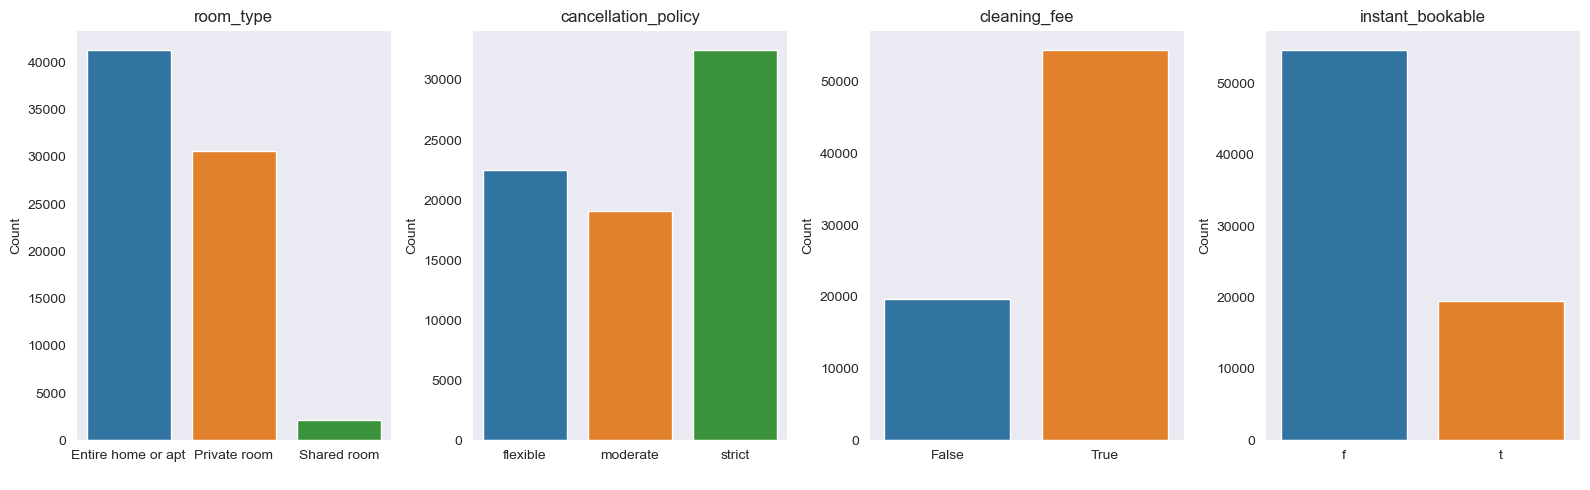

In [16]:
# Define the categorical columns to plot
cat_cols_to_plot = ['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable']

# Create subplots
fig, ax = plt.subplots(1, len(cat_cols_to_plot), figsize=(16, 5))

# Iterate through the categorical columns and create plots
for col, subplot in zip(cat_cols_to_plot, ax.flatten()):
    sns.countplot(data=df2, x=col, ax=subplot)
    subplot.set_xlabel(' ')
    subplot.set_ylabel('Count')
    subplot.set_title(col)

plt.tight_layout()
plt.show()

## Impute Missing Values

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def fill_missing_values(df, random_state=None):
    # Step 1: Identify numeric and categorical columns
    numeric_columns = df.select_dtypes(include=['float64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()  # Include both string and category data

    # Step 2: Impute numeric columns
    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    # Step 3: Handle categorical columns
    for col in categorical_columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
        elif df[col].dtype.name == 'category':
            df[col] = df[col].cat.codes

    # Step 4: Random Forest Iterative Imputer for the entire DataFrame
    rf_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=random_state))
    df = pd.DataFrame(rf_imputer.fit_transform(df), columns=df.columns)

    return df

# Call the function to fill missing values
df3 = fill_missing_values(df2, random_state=42)

df3.head()


,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,0.0,3.0,1.0,2.0,1.0,0.0,100.000000,1.0,1.0,5.010635
1,0.0,7.0,1.0,2.0,1.0,1.0,93.000000,3.0,3.0,5.129899
2,0.0,5.0,1.0,1.0,1.0,1.0,92.000000,1.0,3.0,4.976734
3,0.0,4.0,1.0,0.0,1.0,0.0,94.067365,2.0,2.0,6.620073
4,0.0,2.0,1.0,1.0,1.0,1.0,40.000000,0.0,1.0,4.744932


In [18]:
#Check for missing values again
df3.isna().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

**Feature Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
scaler = StandardScaler()
scaler.fit(df3.drop(['log_price'],axis = 1))
scaled_features = scaler.transform(df3.drop('log_price',axis = 1))

In [20]:
X = scaled_features
Y = df3['log_price']
X= pd.DataFrame(data=X,columns = df3.drop(columns=['log_price']).columns)

In [21]:
#Check the correlation among independent features
X.corr()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds
room_type,1.000000,-0.457982,-0.115771,-0.172873,-0.213118,0.027728,-0.038698,-0.243233,-0.316826
accommodates,-0.457982,1.000000,0.505124,0.206674,0.182343,0.053100,-0.014975,0.709108,0.809980
bathrooms,-0.115771,0.505124,1.000000,0.086523,0.053753,0.001450,0.008924,0.589618,0.525293
cancellation_policy,-0.172873,0.206674,0.086523,1.000000,0.337183,0.013538,-0.020142,0.126334,0.176070
cleaning_fee,-0.213118,0.182343,0.053753,0.337183,1.000000,0.009895,0.027961,0.105402,0.131515
instant_bookable,0.027728,0.053100,0.001450,0.013538,0.009895,1.000000,-0.061013,-0.003645,0.051310
review_scores_rating,-0.038698,-0.014975,0.008924,-0.020142,0.027961,-0.061013,1.000000,0.009672,-0.024215
bedrooms,-0.243233,0.709108,0.589618,0.126334,0.105402,-0.003645,0.009672,1.000000,0.709100
beds,-0.316826,0.809980,0.525293,0.176070,0.131515,0.051310,-0.024215,0.709100,1.000000


In [22]:
## pair of independent variables with correlation greater than 0.5 
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['accommodates', 'bathrooms'],
  ['accommodates', 'bedrooms'],
  ['accommodates', 'beds'],
  ['bathrooms', 'accommodates'],
  ['bathrooms', 'bedrooms'],
  ['bathrooms', 'beds'],
  ['bedrooms', 'accommodates'],
  ['bedrooms', 'bathrooms'],
  ['bedrooms', 'beds'],
  ['beds', 'accommodates'],
  ['beds', 'bathrooms'],
  ['beds', 'bedrooms']],
 12)

In [23]:
series = pd.Series(Y, name='log_price')
Y = pd.DataFrame(series)

Y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932


### Exploratory Data Analysis

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74111 non-null  float64
 1   accommodates          74111 non-null  float64
 2   bathrooms             74111 non-null  float64
 3   cancellation_policy   74111 non-null  float64
 4   cleaning_fee          74111 non-null  float64
 5   instant_bookable      74111 non-null  float64
 6   review_scores_rating  74111 non-null  float64
 7   bedrooms              74111 non-null  float64
 8   beds                  74111 non-null  float64
dtypes: float64(9)
memory usage: 5.1 MB


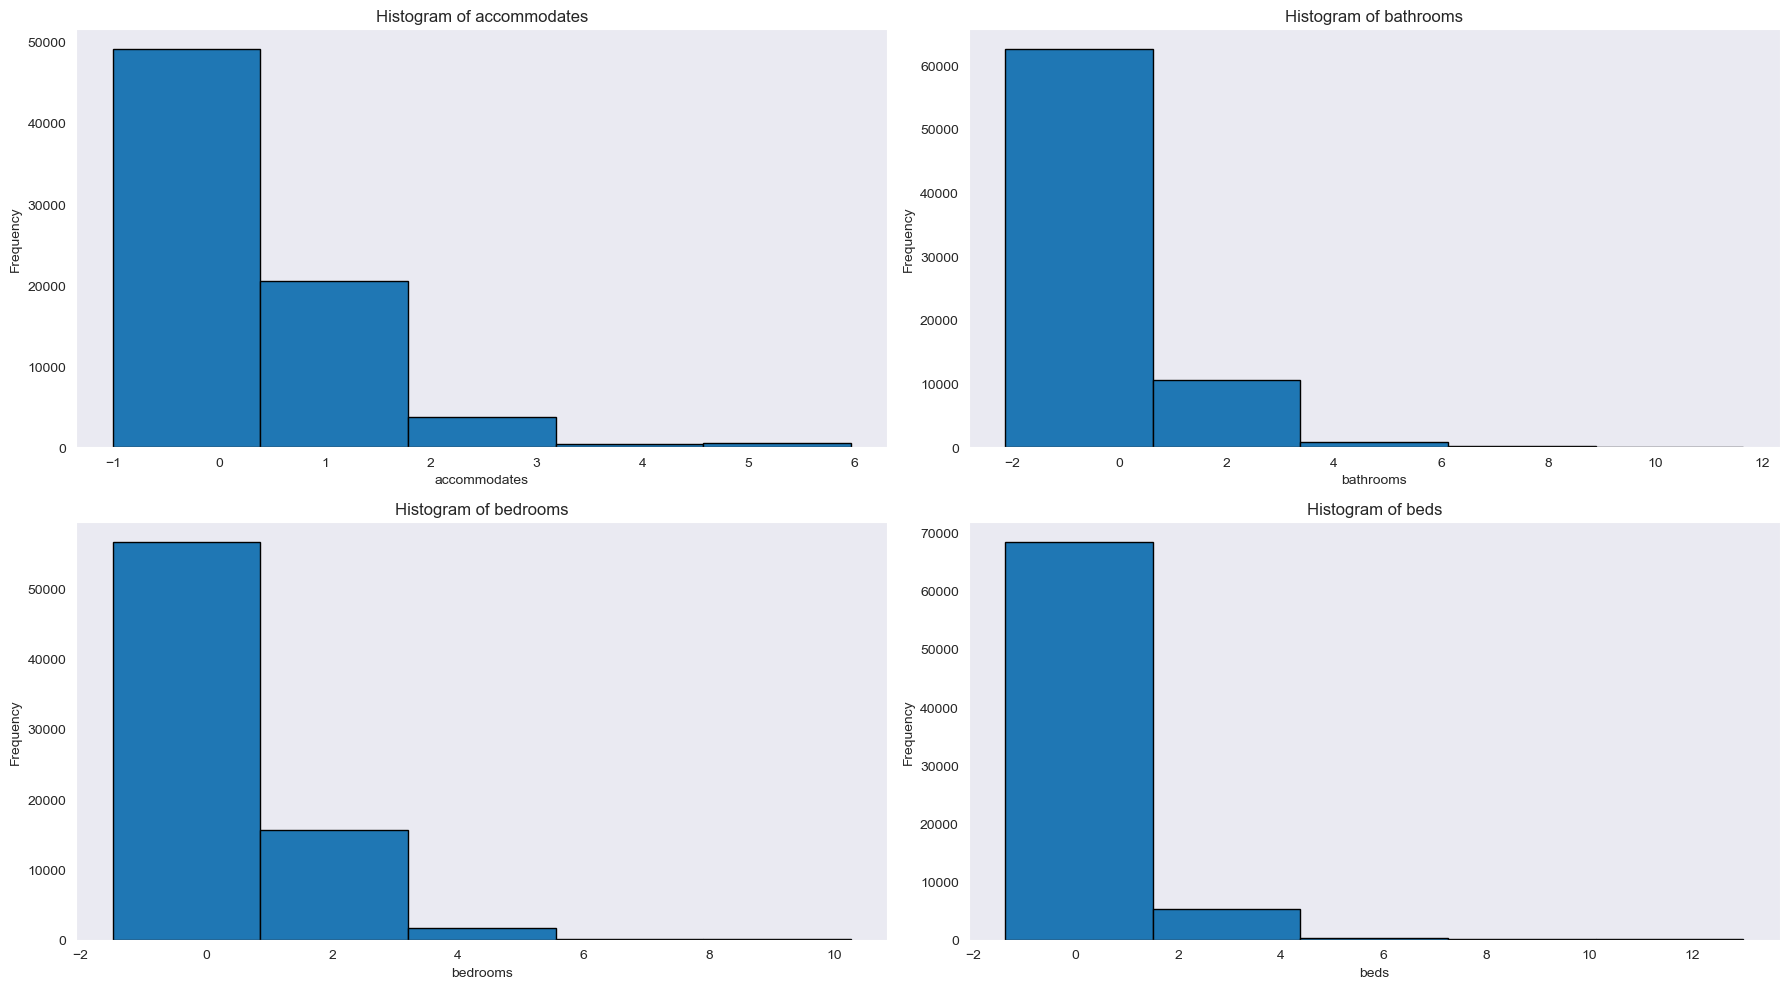

In [25]:
# Select the columns for which you want to create histograms
columns_to_plot = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create histograms for each column
for i, column in enumerate(columns_to_plot):
    X[column].plot.hist(ax=axes[i], bins=5, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

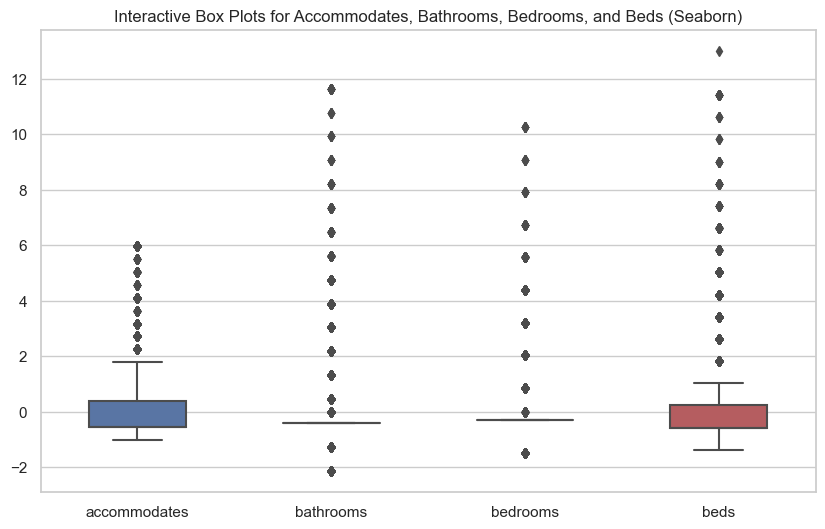

In [26]:
# Display interactive box plots using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(data=X[['accommodates', 'bathrooms', 'bedrooms', 'beds']], width=0.5)
plt.title('Interactive Box Plots for Accommodates, Bathrooms, Bedrooms, and Beds (Seaborn)')
plt.show()

In [27]:
def replace_outliers_with_median(dataframe, threshold=1.5):
    """
    Replace outliers in a DataFrame with the median value of each column.

    Parameters:
    - dataframe: pandas DataFrame
    - threshold: The threshold for identifying outliers (default is 1.5)

    Returns:
    - A DataFrame with outliers replaced by column medians.
    """

    # Calculate the median for each column
    column_medians = dataframe.median()

    # Calculate the Interquartile Range (IQR) for each column
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for identifying outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Replace outliers with column medians
    for column in dataframe.columns:
        is_outlier = (dataframe[column] < lower_bound[column]) | (dataframe[column] > upper_bound[column])
        dataframe.loc[is_outlier, column] = column_medians[column]

    return dataframe

X_cleaned = replace_outliers_with_median(X)
X_cleaned.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds
0,-0.8503,-0.072032,-0.404768,1.016800,0.60188,-0.596535,0.860306,-0.312109,-0.567322
1,-0.8503,1.785370,-0.404768,1.016800,0.60188,1.676347,-0.154781,-0.312109,1.028817
2,-0.8503,0.856669,-0.404768,-0.157519,0.60188,1.676347,-0.299794,-0.312109,1.028817
3,-0.8503,0.392318,-0.404768,-1.331839,0.60188,-0.596535,0.000000,-0.312109,0.230747
4,-0.8503,-0.536383,-0.404768,-0.157519,0.60188,1.676347,0.000000,-0.312109,-0.567322


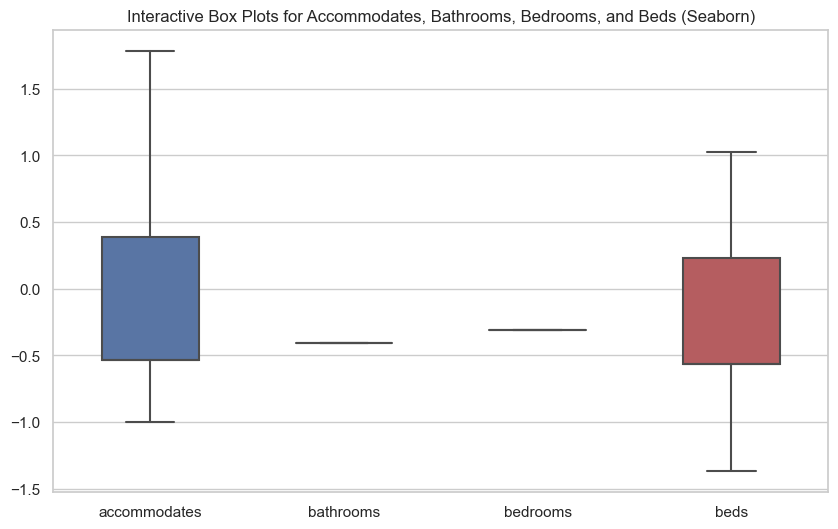

In [28]:
# Display interactive box plots using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(data=X_cleaned[['accommodates', 'bathrooms', 'bedrooms', 'beds']], width=0.5)
plt.title('Interactive Box Plots for Accommodates, Bathrooms, Bedrooms, and Beds (Seaborn)')
plt.show()

### Plotting the Dependent Variable

In [29]:
Y_cleaned = replace_outliers_with_median(Y)
Y_cleaned.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,4.709530
4,4.744932


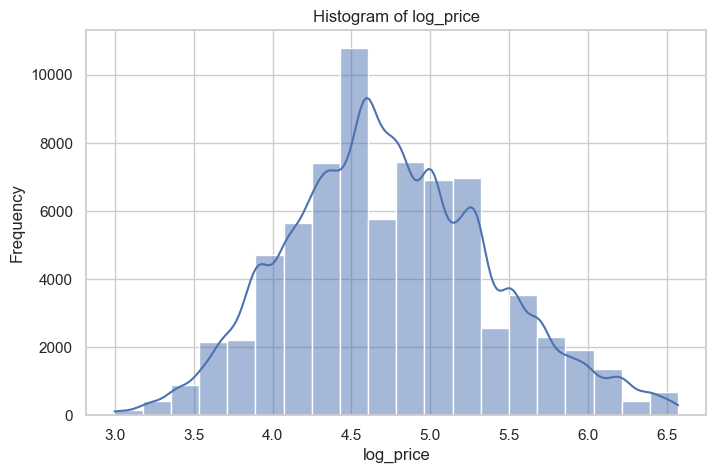

In [30]:
# Create a histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=Y_cleaned, x='log_price', bins=20, kde=True)  # Adjust the number of bins as needed

# Set labels and title
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.title('Histogram of log_price')

# Show the plot
plt.show()

**Correlation Between Numerical Features**

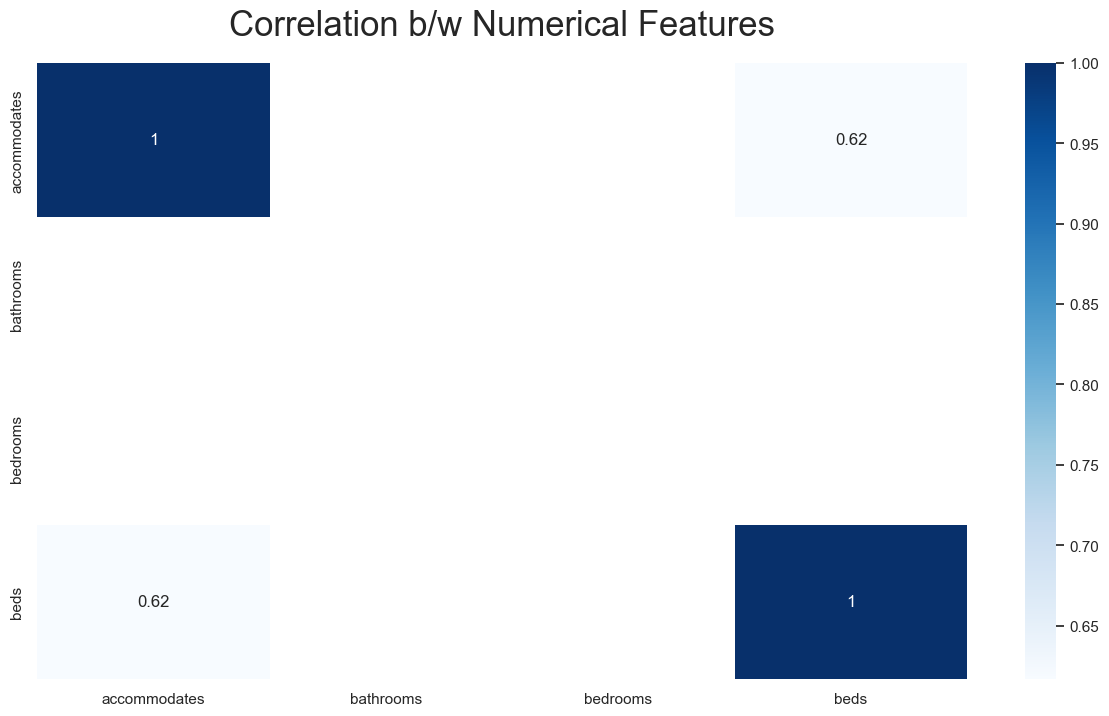

In [31]:
#Define numerical columns

num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

table = X_cleaned[num_cols].corr()
plt.figure(figsize=[15,8])
plt.title("Correlation b/w Numerical Features", size=25, pad=20)
sns.heatmap(table, cmap='Blues', annot=True)
plt.show()

## Modelling

#### Calculating variance inflation factor

In [32]:
#importing varience inflation factor from the stats model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X_cleaned

## calculating VIF for every column
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

room_type               1.358775
accommodates            1.915140
bathrooms               0.000000
cancellation_policy     1.151552
cleaning_fee            1.167189
instant_bookable        1.011137
review_scores_rating    1.009826
bedrooms                0.000000
beds                    1.618139
dtype: float64

There is no multicollinearity in the data.

In [33]:
X_cleaned.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds
0,-0.8503,-0.072032,-0.404768,1.016800,0.60188,-0.596535,0.860306,-0.312109,-0.567322
1,-0.8503,1.785370,-0.404768,1.016800,0.60188,1.676347,-0.154781,-0.312109,1.028817
2,-0.8503,0.856669,-0.404768,-0.157519,0.60188,1.676347,-0.299794,-0.312109,1.028817
3,-0.8503,0.392318,-0.404768,-1.331839,0.60188,-0.596535,0.000000,-0.312109,0.230747
4,-0.8503,-0.536383,-0.404768,-0.157519,0.60188,1.676347,0.000000,-0.312109,-0.567322


In [34]:
X = X_cleaned
Y = Y_cleaned['log_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

### Modeling and Prediction using Linear Regression

In [35]:
reg=LinearRegression(normalize =True)
reg.fit(X_train, Y_train)

LinearRegression(normalize=True)

In [36]:
pred = reg.predict(X_test)

**Plot predicted values**

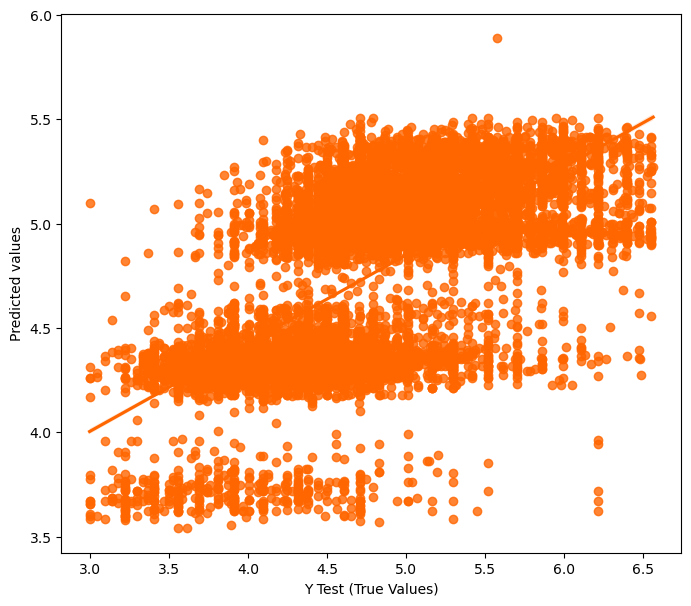

In [37]:
# Recover default matplotlib settings
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(8,7))
sns.regplot(x = Y_test,y = pred, color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [38]:
reg.score(X_test,Y_test)

0.4222471790520699

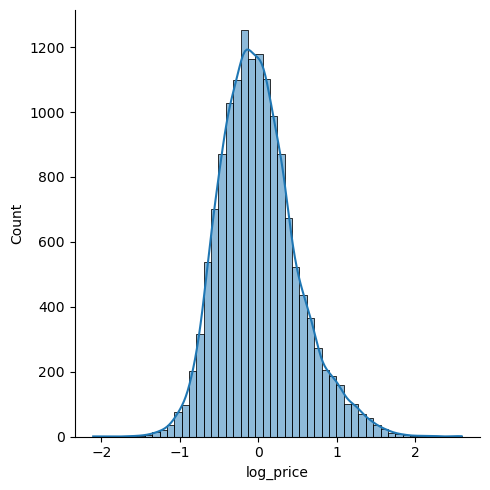

In [39]:
sns.displot(Y_test - pred, bins = 50, kde = True)
plt.show()

**Check coefficients of each variable**

In [40]:
cdf = pd.DataFrame(reg.coef_,X.columns,columns = ['coef'])
cdf

,coef
room_type,-3.284177e-01
accommodates,1.964520e-01
bathrooms,-3.552714e-15
cancellation_policy,2.088871e-02
cleaning_fee,-1.598656e-02
instant_bookable,-2.147356e-02
review_scores_rating,5.881170e-02
bedrooms,0.000000e+00
beds,2.457078e-02


**Model Coefficients**

In [41]:
coefficients_table=pd.DataFrame({'column':X_train.columns,
                                'coefficients':reg.coef_})
coefficients_table=coefficients_table.sort_values(by="coefficients")

Text(0.5, 1.0, 'Normalized coefficients')

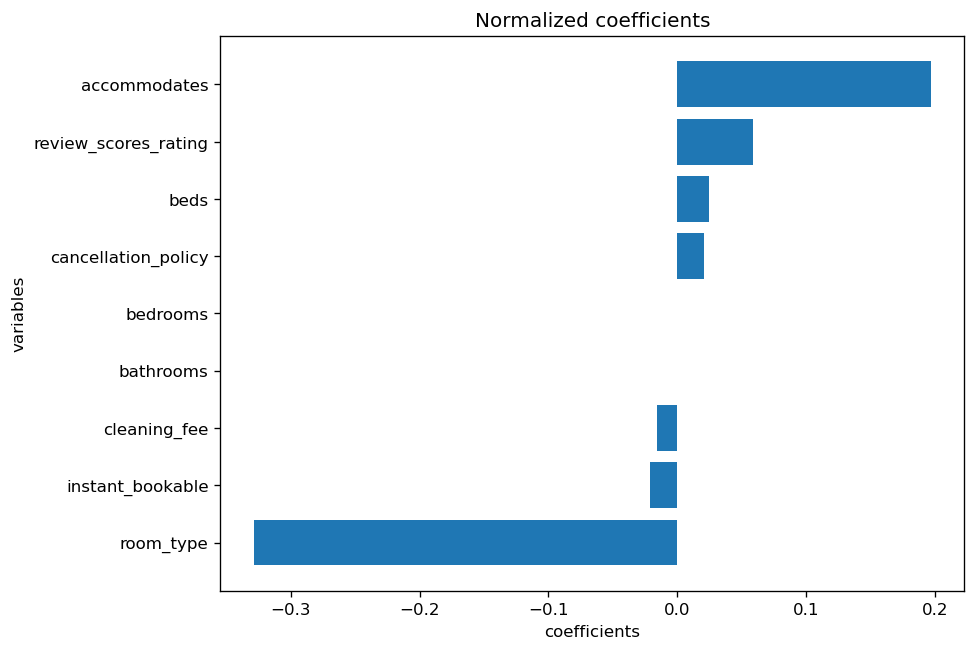

In [42]:
plt.figure(figsize=(8,6), dpi=120)
x=coefficients_table['column']
y=coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel("coefficients")
plt.ylabel("variables")
plt.title("Normalized coefficients")

In [43]:
# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate and print the R-squared (R²) value
r_squared = r2_score(Y_test, y_pred)
print(f"R-squared (R²): {r_squared:.6f}")

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.6f}")

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Calculate and print the Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")

R-squared (R²): 0.422247
Mean Absolute Error (MAE): 0.383914
Mean Squared Error (MSE): 0.242296
Root Mean Squared Error (RMSE): 0.492236


In [44]:
# Make predictions on the test set
y_pred = reg.predict(X_test)

# Create a list to store the actual and predicted values
results = []

# Store the actual and predicted log_price values in the list
for actual, predicted in zip(Y_test, y_pred):
    results.append((actual, predicted))

# Convert the list into a DataFrame
reg_df = pd.DataFrame(results, columns=['Actual log_price', 'Predicted log_price'])

# Print the DataFrame
reg_df.head(10)

,Actual log_price,Predicted log_price
0,4.700480,4.408437
1,4.369448,5.235123
2,4.442651,4.214873
3,3.663562,4.262255
4,5.273000,5.009018
5,5.416100,4.274346
6,4.787492,4.351102
7,5.616771,5.034565
8,4.744932,4.419020
9,3.912023,4.361911


### Modeling and Prediction using XGBoost Regression

In [45]:
import xgboost as xg

# create an xgboost regression model
model = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [46]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the R-squared (R²) value
r_squared = r2_score(Y_test, y_pred)
print(f"R-squared (R²): {r_squared:.6f}")

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.6f}")

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Calculate and print the Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")

R-squared (R²): 0.431801
Mean Absolute Error (MAE): 0.382468
Mean Squared Error (MSE): 0.238289
Root Mean Squared Error (RMSE): 0.488149


In [47]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a list to store the actual and predicted values
results = []

# Store the actual and predicted log_price values in the list
for actual, predicted in zip(Y_test, y_pred):
    results.append((actual, predicted))

# Convert the list into a DataFrame
XGBoost_df = pd.DataFrame(results, columns=['Actual log_price', 'Predicted log_price'])

# Print the DataFrame
XGBoost_df.head(10)

,Actual log_price,Predicted log_price
0,4.700480,4.455066
1,4.369448,5.057521
2,4.442651,4.257288
3,3.663562,4.304819
4,5.273000,5.135436
5,5.416100,4.314541
6,4.787492,4.381678
7,5.616771,5.006399
8,4.744932,4.305595
9,3.912023,3.976254


### Modelling and Prediction using Random Forest Regressor

In [58]:
cls = RandomForestRegressor(n_estimators=250, criterion='mse', max_depth=30)

cls.fit(X_train, Y_train)
'''scoreOfModel = cls.score(X_train, Y_train)
print("Score is calculated as: ",scoreOfModel)'''

'scoreOfModel = cls.score(X_train, Y_train)\nprint("Score is calculated as: ",scoreOfModel)'

**Plot Log Price(orange line) and Predicted Log Price(blue line)**

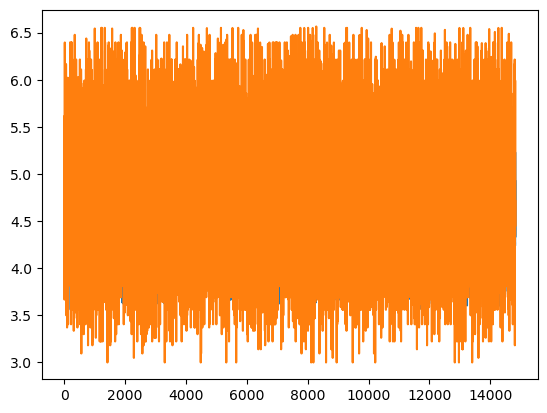

In [49]:
r = []
for pair in  zip(pred, Y_test):
    r.append(pair)

plt.plot(r)

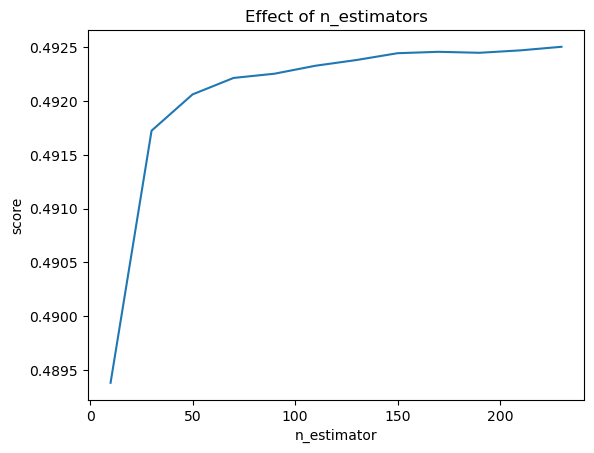

In [50]:
estimators = np.arange(10, 250, 20) # 10 to 250 increased with 10
scores = []
for n in estimators:
    cls.set_params(n_estimators=n)
    cls.fit(X_train, Y_train)
    scores.append(cls.score(X_train, Y_train))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [51]:
# Make predictions on the test set
y_pred = cls.predict(X_test)

# Calculate and print the R-squared (R²) value
r_squared = r2_score(Y_test, y_pred)
print(f"R-squared (R²): {r_squared:.6f}")

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.6f}")

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Calculate and print the Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")

R-squared (R²): 0.430065
Mean Absolute Error (MAE): 0.383165
Mean Squared Error (MSE): 0.239017
Root Mean Squared Error (RMSE): 0.488894


In [52]:
# Make predictions on the test set
y_pred = cls.predict(X_test)

# Create a list to store the actual and predicted values
results = []

# Store the actual and predicted log_price values in the list
for actual, predicted in zip(Y_test, y_pred):
    results.append((actual, predicted))

# Convert the list into a DataFrame
results_df = pd.DataFrame(results, columns=['Actual log_price', 'Predicted log_price'])

# Print the DataFrame
results_df.head(10)

,Actual log_price,Predicted log_price
0,4.700480,4.446957
1,4.369448,5.046043
2,4.442651,4.326363
3,3.663562,4.305383
4,5.273000,5.136660
5,5.416100,4.319652
6,4.787492,4.379688
7,5.616771,5.045321
8,4.744932,4.292928
9,3.912023,3.981520


The XGBoost Regression performs the best among the three regression models with an accuracy of **43.18%** and the loweset **RMSE of 0.488149.**
Nevertheless, all the models perform poorly with an R-squared of less than 50%. 
The problem could be due to the dataset used in the prediction.